# Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#1-predictor" data-toc-modified-id="1-predictor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1 predictor</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Accuracy score</a></span></li></ul></li><li><span><a href="#Many-predictors" data-toc-modified-id="Many-predictors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Many predictors</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Accuracy score</a></span></li><li><span><a href="#predict_proba" data-toc-modified-id="predict_proba-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>predict_proba</code></a></span></li><li><span><a href="#Setting-threshold-manually" data-toc-modified-id="Setting-threshold-manually-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Setting threshold manually</a></span></li></ul></li><li><span><a href="#Under-the-hood" data-toc-modified-id="Under-the-hood-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Under the hood</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#F1-score" data-toc-modified-id="F1-score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>F1 score</a></span></li><li><span><a href="#F_beta-score" data-toc-modified-id="F_beta-score-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>F_beta score</a></span></li></ul></li><li><span><a href="#Choosing-the-best-threshold" data-toc-modified-id="Choosing-the-best-threshold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choosing the best threshold</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

In [4]:
import pandas as pd
import seaborn as sns

 * **Regression** models are used when the target variable is **quantitative**: 
  - salaries
  - gas emissions
  - age of person in a picture
  - ...
 * **Classification** models are used when the target variable is **qualitative**: 
  - surviving (or not) the Titanic
  - paying back (or not) a loan
  - identifying a dog (or not) in a picture
  - deciding which one of 3 plant species is this one
  - ...

Metrics are specially important in classification problems!

You must understand the business goal in order to choose the appropiate metric.

## Data exploration

In [5]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [6]:
df.shape

(569, 31)

In [7]:
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763,0
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0
436,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735,0
487,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,0.06115,...,30.39,153.90,1740.0,0.1514,0.3725,0.59360,0.20600,0.3266,0.09009,1
379,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.9379,0.84020,0.25240,0.4154,0.14030,1


In [8]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'is_cancer'],
      dtype='object')

Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

Target variable is `is_cancer`  
It is a categorical variable, taking possible values $0$ and $1$

<AxesSubplot:xlabel='is_cancer', ylabel='count'>

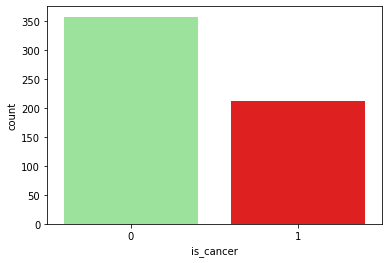

In [9]:
sns.countplot(x=df.is_cancer, palette=["lightgreen", "red"])

<AxesSubplot:xlabel='mean_radius', ylabel='Count'>

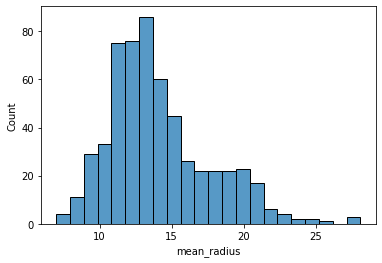

In [24]:
sns.histplot(x=df.mean_radius)

<AxesSubplot:xlabel='mean_radius', ylabel='Density'>

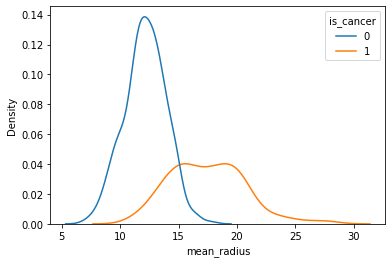

In [17]:
sns.kdeplot(x=df.mean_radius, hue=df.is_cancer)

<AxesSubplot:xlabel='mean_area', ylabel='Density'>

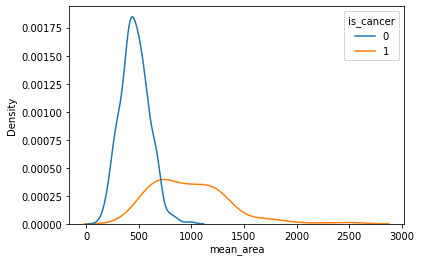

In [25]:
sns.kdeplot(x=df.mean_area, hue=df.is_cancer)

<AxesSubplot:xlabel='mean_radius', ylabel='mean_area'>

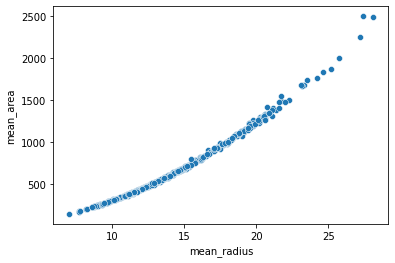

In [18]:
sns.scatterplot(x=df.mean_radius, y=df.mean_area)

## Logistic regression

Logistic regression is the simplest classification ML model

### 1 predictor

#### Model

Lets try to predict `is_cancer` using only as a predictor `mean_radius`

<AxesSubplot:xlabel='mean_radius', ylabel='is_cancer'>

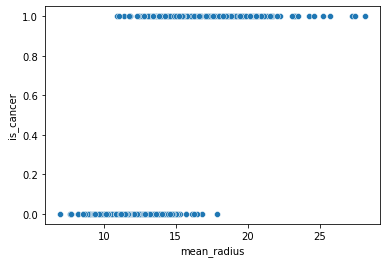

In [27]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)

In [28]:
df2 = df[["mean_radius", "is_cancer"]].copy()

In [30]:
df2.sample(10).sort_values("mean_radius")

,mean_radius,is_cancer
46,8.196,0
332,11.220,0
297,11.760,1
52,11.940,0
346,12.060,0
315,12.490,0
442,13.780,0
277,18.810,1
535,20.550,1
180,27.220,1


In [31]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn.model_selection import train_test_split

In [67]:
log = LogisticRegression()

In [62]:
df2.shape

(569, 4)

In [75]:
log.fit(
    X=df2[["mean_radius"]],
    y=df2.is_cancer
)

LogisticRegression()

A trained model is a *prediction machine*

How would it have performed with the 5 first patients?

In [79]:
df2.mean_radius.head()

0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: mean_radius, dtype: float64

In [80]:
df2.is_cancer.head()

0    1
1    1
2    1
3    1
4    1
Name: is_cancer, dtype: int64

In [81]:
log.predict(df2[["mean_radius"]])[:5]

array([1, 1, 1, 0, 1])

It would have guessed correctly 4 out of 5

In [82]:
df2["prediction_cancer"] = log.predict(df2[["mean_radius"]])

In [86]:
df2.sample(10, random_state=666)

,mean_radius,is_cancer,prediction_cancer
121,18.66,1,1
322,12.86,0,0
55,11.52,0,0
89,14.64,0,0
317,18.22,1,1
253,17.30,1,1
64,12.68,1,0
185,10.08,0,0
35,16.74,1,1
380,11.27,0,0


#### Accuracy score

How many predictions were correct?

In [88]:
df2["correct"] = df2.is_cancer == df2.prediction_cancer

In [89]:
df2.sample(10, random_state=666)

,mean_radius,is_cancer,prediction_cancer,correct
121,18.66,1,1,True
322,12.86,0,0,True
55,11.52,0,0,True
89,14.64,0,0,True
317,18.22,1,1,True
253,17.30,1,1,True
64,12.68,1,0,False
185,10.08,0,0,True
35,16.74,1,1,True
380,11.27,0,0,True


Accuracy is the proportion of good predictions

In [90]:
accuracy = df2.correct.sum() / df2.shape[0]

In [91]:
accuracy.round(3)

0.879

Lets do the same with train / test split (as it should always be done)

In [92]:
X = df2[["mean_radius"]]
y = df2.is_cancer

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=466)

In [126]:
X_train.shape, X_test.shape

((455, 1), (114, 1))

In [127]:
X_test[["mean_radius"]][:5]

,mean_radius
556,10.16
560,14.05
231,11.32
134,18.45
0,17.99


In [128]:
log = LogisticRegression()

In [129]:
log.fit(
    X_train, 
    y_train
)

LogisticRegression()

Lets see performance on test

In [130]:
X_test[:5]

,mean_radius
556,10.16
560,14.05
231,11.32
134,18.45
0,17.99


In [131]:
y_test[:5]

556    0
560    0
231    0
134    1
0      1
Name: is_cancer, dtype: int64

In [132]:
log.predict(X_test)[:5]

array([0, 0, 0, 1, 1])

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
# train score
accuracy_score(y_train, log.predict(X_train))

0.8879120879120879

In [135]:
# test score
accuracy_score(y_test, log.predict(X_test))

0.8596491228070176

In [136]:
from sklearn.model_selection import cross_validate

Lets look at a cross validation example with 5 folds

In [140]:
cv_results = cross_validate(LogisticRegression(), X, y, cv=5, return_train_score=True)

In [141]:
cv_results

{'fit_time': array([0.01485157, 0.01015067, 0.00607014, 0.00652528, 0.00524282]),
 'score_time': array([0.0024569 , 0.00189686, 0.00118923, 0.00164294, 0.00118828]),
 'test_score': array([0.8245614 , 0.85087719, 0.87719298, 0.9122807 , 0.89380531]),
 'train_score': array([0.8967033 , 0.89010989, 0.87912088, 0.86813187, 0.87061404])}

In [144]:
cv_results.get("test_score").mean().round(3)

0.872

How many True/False Positives/Negatives do we have?

We build the confusion matrix

In [148]:
del df2["correct"]

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [149]:
df.shape

(569, 31)

In [150]:
df2.head(10)

,mean_radius,is_cancer,prediction_cancer
0,17.99,1,1
1,20.57,1,1
2,19.69,1,1
3,11.42,1,0
4,20.29,1,1
5,12.45,1,0
6,18.25,1,1
7,13.71,1,0
8,13.00,1,0
9,12.46,1,0


In [151]:
pd.crosstab(
    df2.is_cancer,
    df2.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,333,24
1,45,167


Graphical interpretation of the model

In [152]:
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)
y = log.predict(x.reshape(-1, 1))

In [153]:
import matplotlib.pyplot as plt

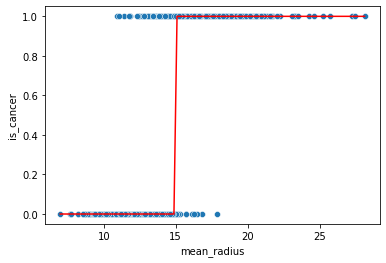

In [154]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)
plt.plot(x, y, c= "red")

### Many predictors

#### Model

More iterations more time

In [159]:
# if no max_iter, convergence problems arise (python warns you)
log = LogisticRegression(max_iter=10000)

We use all variables **except** `is_cancer` to try and predict `is_cancer`

In [160]:
df3 = df.copy()

In [161]:
X = df3.drop("is_cancer", axis=1)
y = df3.is_cancer

In [163]:
log.fit(X, y)

LogisticRegression(max_iter=10000)

In [164]:
df3["prediction_cancer"] = log.predict(X)

In [165]:
df3b = df3[["is_cancer", "prediction_cancer"]].copy()

In [166]:
df3b["correct"] = (df3b.is_cancer == df3.prediction_cancer)

In [167]:
df3b.sample(10)

,is_cancer,prediction_cancer,correct
111,0,0,True
247,0,0,True
10,1,1,True
533,1,1,True
18,1,1,True
431,0,0,True
103,0,0,True
413,0,1,False
356,0,0,True
276,0,0,True


In [169]:
# accuracy
df3b.correct.mean()

0.9578207381370826

Confusion matrix

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [170]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


#### Accuracy score

Accuracy is the proportion of good predictions

In [171]:
acc = (348 + 197) / df3.shape[0]

In [172]:
round(acc, 3)

0.958

We got better accuracy using many predictors instead of one (as expected!)

Using the train test split paradigm:  
 - Split dataset in train and test.
 - Use train to train model.
 - Predict test.
 - Evaluate accuracy between predictions and real test entries.

#### `predict_proba`

Logistic regression actually predicts probabilities

We, as data scientists, want more precise information than just the *discrete* prediction 0, 1

In [180]:
df.iloc[35:40]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633,1
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140,1
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,1


In [181]:
# lets see what our model predicts for this 5 patients
log.predict(X[35:40])

array([1, 1, 0, 0, 0])

In [184]:
log.predict_proba(X[35:40]).round(3)[:, 1]

array([1.   , 0.885, 0.   , 0.378, 0.387])

In [185]:
df3["prediction_proba_cancer"] = log.predict_proba(X)[:, 1]

In [186]:
df3b["prediction_proba_cancer"] = df3.prediction_proba_cancer

<AxesSubplot:xlabel='prediction_proba_cancer', ylabel='Count'>

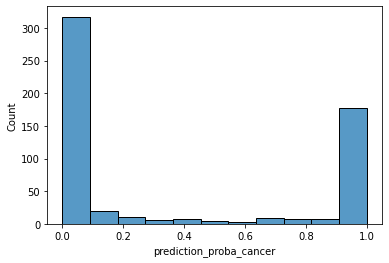

In [197]:
sns.histplot(df3b.prediction_proba_cancer)

In [196]:
df3b.sample(10, random_state=166)

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
447,0,0,True,0.054727
346,0,0,True,0.006432
501,1,1,True,0.951368
504,0,0,True,0.000058
536,1,0,False,0.396332
526,0,0,True,0.111163
299,0,0,True,0.000066
449,1,1,True,1.000000
327,0,0,True,0.000352
297,1,0,False,0.008882


Graphical interpretation in the case of ONE PREDICTOR

The curve gives the probability (Y) of cancer given the mean_radius (X)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

#### Setting threshold manually

Default `predict` just computes `predict_proba` > 0.5

In [198]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,1.000000
1,1,1,True,0.999996
2,1,1,True,0.999999
3,1,1,True,0.681318
4,1,1,True,0.999764


Remember the original confusion matrix

In [199]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


Lets change the default threshold 0.5 and see how results change

Setting the threshold as 0.1 *invites* predictions to be Positive

Will False Positives increase?  
Will False Negatives increase?

**Example 1: low threshold**

In [200]:
threshold = 0.1

In [201]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,319,38
1,1,211


In [202]:
accu = (319 + 211) / df.shape[0]

In [203]:
round(accu, 3)

0.931

Almost all positives were found (higher **recall**)

More false positives appeared (lower **precision**)

**Example 2: high threshold**

Recall 0.5 threshold crosstab

In [204]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [205]:
threshold = 0.8

In [206]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,356,1
1,28,184


Almost all predicted positives are true (higher **precision**)

We predicted 28 real cancers as False (low **recall**)

### Under the hood

The logistic function is a mathematical function defined as
$$\sigma(z)=\frac{1}{1 + e^{-z}}$$

**Exercise**: 
 * $\sigma(0)= \frac{1}{2}$

 * $\lim_{z \rightarrow \infty} \sigma(z)= 1$

 * $\lim_{z \rightarrow -\infty} \sigma(z)=0$

In [207]:
z = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-z))

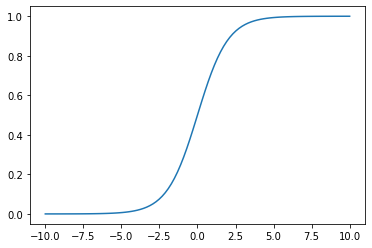

In [208]:
plt.plot(z, sigma, "-")

**Exercise**: $$\sigma'(z)=\sigma(z)(1-\sigma(z))$$

In [214]:
pd.Series(log.coef_[0], index=X.columns)

mean_radius               -1.001714
mean_texture              -0.182245
mean_perimeter             0.273429
mean_area                 -0.022627
mean_smoothness            0.180120
mean_compactness           0.217403
mean_concavity             0.536828
mean_concave_points        0.297731
mean_symmetry              0.267549
mean_fractal_dimension     0.030103
radius_error               0.078323
texture_error             -1.263733
perimeter_error           -0.115488
area_error                 0.108789
smoothness_error           0.025790
compactness_error         -0.071056
concavity_error            0.034885
concave_points_error       0.038532
symmetry_error             0.035135
fractal_dimension_error   -0.014630
worst_radius              -0.148442
worst_texture              0.438029
worst_perimeter            0.105951
worst_area                 0.013722
worst_smoothness           0.361136
worst_compactness          0.680600
worst_concavity            1.431953
worst_concave_points       0

The logistic regression finds the **optimal** parameters $\beta_0$, ..., $\beta_n$ such that the predictions 
$$\hat{y}=\sigma(\beta _{0}+\beta _{1}x_1 + ... + \beta_n x_n)=\frac{1}{1 + e^{-(\beta _{0}+\beta _{1}x_1 + ... + \beta_n x_n)}}$$ have the least error

## Metrics

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

Remember: 
 * a metric should be chosen a-priori, with deep understanding of the problem. Then several models are trained and the one with best metric result is chosen
 * here we present different metrics for the same model as an exercise. The results (0.94, 0.92, 0.95 should by no means be compared!!)

On the left rectangle, Real Positives  
On the right rectangle, Real Negatives

Inside the circle, Predicted Positives  
Outside the circle, Predicted Negatives

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/buckets.png">

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

### Accuracy

 * It represents the proportion of samples predicted correctly
 * The most common metric for classification
 * Useful when:
  - dataset has balanced classes (similar proportion of True and False)
  - there is symmetry between True and False (for example, predicting "male" or "female")
 * **Often misused!!** since:
  - many problems have imbalanced classes (for example, terrorist vs no terrorist)
  - many problems are not symmetric (for example, cancer vs no cancer)
 * I do not like accuracy metric. Be alert!

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/accuracy.png">

In [216]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,1.000000
1,1,1,True,0.999996
2,1,1,True,0.999999
3,1,1,True,0.681318
4,1,1,True,0.999764


In [217]:
accuracy_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9578207381370826

In [204]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [221]:
(348 + 197) / (348 + 9 + 15 + 197)

0.9578207381370826

### Recall

(also known as sensitivity) is the fraction of positive events that you predicted correctly, as shown below

It values as **crucial** to identify true instances (useful for cancer detection / terrorist detection airport)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/recall.png">

In [218]:
recall_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9292452830188679

In [204]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [219]:
197 / (197 + 15)

0.9292452830188679

### Precision

is the fraction of predicted positives events that are actually positive as shown below

It values as **crucial** to **not** have False Positives (very aggresive treatments of not very malicious diseases)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/precision.png">

In [222]:
precision_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9563106796116505

In [204]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,348,9
1,15,197


In [223]:
197 / (197 + 9)

0.9563106796116505

### F1 score

 * **recall** is, in general, more important than precision but...
 * higher recall always implies lower precision (via lower threshold)
 * a tradeoff should be found

The F1 score is the harmonic mean of recall and precision:

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/f1_score.png">

In [224]:
f1_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9425837320574162

### F_beta score

 * **recall** is, in general, more important than precision but...
 * higher recall always implies lower precision (via lower threshold)
 * a tradeoff should be found

The $F_1$ score is the harmonic mean of recall and precision

The $F_\beta$ score is a **weighed** mean of recall and precision

<img width=600 src="https://miro.medium.com/max/1180/1*cHOhrncdnWK0vA2baH0AWA.jpeg">

The `beta` parameter determines the weight of **recall** in the combined score

We, toguether with doctors (technicians) and government (money, time) decide that $\beta=3$ is a good choice for breast cancer detection:
 * we value finding real positives...
 * 3 times more than...
 * losing time with false positives

In [225]:
fbeta_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer,
    beta=3
)

0.9318826868495742

## Choosing the best threshold

Lets choose the threshold that optimizes $F_3$ score

In [230]:
df3b[["is_cancer", "prediction_proba_cancer"]].sample(10, random_state=666)

,is_cancer,prediction_proba_cancer
121,1,0.999993
322,0,0.003261
55,0,0.001051
89,0,0.204039
317,1,0.999726
253,1,0.976387
64,1,0.997706
185,0,0.000472
35,1,0.999540
380,0,0.001642


In [231]:
import numpy as np

In [273]:
results = []

In [269]:
y_true = df3b.is_cancer

for threshold in np.arange(0, 1.01, 0.05):
    y_pred = df3b.prediction_proba_cancer > threshold
    
    result = {
        "threshold": threshold,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f3": fbeta_score(y_true, y_pred, beta=3)
    }
    
    results.append(result)

/home/sheriff/miniconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
res = pd.DataFrame(results)
res

,threshold,accuracy,precision,recall,f3
0,0.00,0.372583,0.372583,1.000000,0.855874
1,0.05,0.899824,0.790262,0.995283,0.970115
2,0.10,0.931459,0.847390,0.995283,0.978210
3,0.15,0.947276,0.882353,0.990566,0.978565
4,0.20,0.954306,0.900862,0.985849,0.976636
5,0.25,0.961336,0.924107,0.976415,0.970919
6,0.30,0.959578,0.923767,0.971698,0.966682
7,0.35,0.964851,0.940367,0.966981,0.964252
8,0.40,0.959578,0.947867,0.943396,0.943841
9,0.45,0.961336,0.952381,0.943396,0.944287


In [272]:
optimal_threshold = res.threshold[res.f3.argmax()]
optimal_threshold

0.15000000000000002

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [256]:
pd.crosstab(df3b.is_cancer, df3b.prediction_proba_cancer > 0.15)

prediction_proba_cancer,False,True
is_cancer,,
0,329,28
1,2,210


In [257]:
# if I were to use a ridiculously low threshold
# I would have 100% recall
# but very low precision
pd.crosstab(df3b.is_cancer, df3b.prediction_proba_cancer > 0.000001)

prediction_proba_cancer,False,True
is_cancer,,
0,2,355
1,0,212


<img width=700 src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg">

## Summary

 * Classification predicts qualitative outputs (classes)
 * Logistic regression is the most commonly used classification algorithm (not for being best, but for being explainable and classic)
 * Logistic regression predicts probabilities (`.predict_proba`, between 0 and 1) and may apply threshold for you (`.predict`)

 * We have different classification metrics
 * A metric should be decided before training different models! Human criteria translates into metric choice
 * A metric lets us choose the best model (here we chose the best threshold for our final model)
 * For choosing a metric, look at 
  - class balance
  - class symmetry

## Further materials

[ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)